In [1]:
%load_ext jupyter_black

In [2]:
from datetime import datetime
from griblib.hrrr import load_hrrr

In [3]:
hrrr = load_hrrr(datetime(2022, 6, 14), 24)
hrrr

HRRR(start_date=datetime.datetime(2022, 6, 14, 0, 0), hours=24, date_range=DatetimeIndex(['2022-06-14', '2022-06-15'], dtype='datetime64[ns]', freq='D'), fs=<s3fs.core.S3FileSystem object at 0x7f582bd674f0>)

In [4]:
# parameter_long_name: defines the method name
# vertical_level: is an argument passed into the method
# parameter_short_name: is used internally to retrive and index the data
hrrr.surface

,vertical_level,parameter_short_name
parameter_long_name,,
hail,0.1_sigma_layer,HAIL_1hr_max_fcst
vertical_velocity,0.5_0.8_sigma_layer,DZDT_1hr_ave_fcst
hourly_maximum_of_upward_vertical_velocity,100_1000mb_above_ground,MAXUVV_1hr_max_fcst
hourly_maximum_of_downward_vertical_velocity,100_1000mb_above_ground,MAXDVV_1hr_max_fcst
relative_vorticity,1000_0m_above_ground,RELV_1hr_max_fcst
...,...,...
upward_short-wave_rad._flux,top_of_atmosphere,USWRF
"simulated_brightness_temperature_for_goes_11,_channel_3",top_of_atmosphere,SBT113
"simulated_brightness_temperature_for_goes_11,_channel_4",top_of_atmosphere,SBT114


In [5]:
# each long_name method has a default vertical_level set
hail = hrrr.surface.forecast.hail()

In [6]:
hail

<xarray.Dataset>
Dimensions:                  (time: 72, projection_x_coordinate: 1799,
                              projection_y_coordinate: 1059, valid_time: 2)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-14T01:00:00 ... 20...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.587e+06 ......
Dimensions without coordinates: valid_time
Data variables:
    HAIL_1hr_max_fcst        (valid_time, time, projection_y_coordinate, projection_x_coordinate) float16 dask.array<chunksize=(1, 72, 150, 150), meta=np.ndarray>
    forecast_period          (valid_time, time) timedelta64[ns] dask.array<chunksize=(1, 72), meta=np.ndarray>
    forecast_reference_time  (valid_time) datetime64[ns] 2022-06-14 2022-06-15

In [14]:
import numpy as np
import matplotlib.pyplot as plt

a = hail["HAIL_1hr_max_fcst"][0][0]
alpha = np.where(a > 0, 1, 0)

TypeError: cannot unpack non-iterable AxesSubplot object

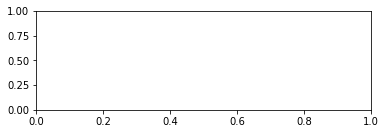

In [15]:
import cartopy.crs as crrs

fig, ax = plt.subplot(2, 1, 1, projection=None)

# a.plot(figsize=(20, 20))
# xr.plot.scatter(hail, x="projection_x_coordinate", y="projection_y_coordinate", alpha=alpha,cmap=plt.get("jet"))